## Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('../data/2-preprocessed/cleanIPF.csv')
df = pd.read_csv('../data/1-raw/openpowerlifting-2025-09-27-IPF-Open.csv')

/var/folders/wm/mz0f2pm95tn34tffq_n21nv80000gn/T/ipykernel_36384/3052032468.py:2: DtypeWarning: Columns (33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/1-raw/openpowerlifting-2025-09-27-IPF-Open.csv')


In [4]:
df.shape[:]
null = df.query('BodyweightKg != BodyweightKg')
print(null)

                    Name Sex Event Equipment   Age AgeClass BirthYearClass  \
811      Chloe Blackwell   F   SBD       Raw  28.0    24-34          24-39   
819        Dale Rowlands   M   SBD       Raw  29.0    24-34          24-39   
5450       Don Reinhoudt   M   SBD       Raw  29.0    24-34          24-39   
6983       Tessa Sjamaar   F   SBD       Raw   NaN      NaN            NaN   
40447      Catriona Bell   F   SBD       Raw  28.5    24-34          24-39   
...                  ...  ..   ...       ...   ...      ...            ...   
247762   Ivan Mikulandra   M   SBD       Raw  30.5    24-34          24-39   
247763       Josip Torić   M   SBD       Raw   NaN      NaN            NaN   
247764    Mario Paradžik   M   SBD       Raw  21.5    20-23          19-23   
247765  Selvir Mujanović   M   SBD       Raw   NaN      NaN            NaN   
247766       Šime Mandić   M   SBD       Raw   NaN    20-23          19-23   

       Division  BodyweightKg WeightClassKg  ...    Country  St

In [5]:
df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift
count,203605.000000,247786.000000,191931.000000,190777.000000,187833.000000,7.000000,244023.000000,191597.000000,190585.000000,187428.000000,...,191129.000000,189205.000000,185492.000000,6.000000,243429.000000,239473.000000,239273.000000,239273.000000,239273.000000,239258.000000
mean,28.296987,83.469549,127.703541,119.364694,57.021463,-96.142857,172.279783,87.541507,67.880763,-3.845633,...,168.004956,149.254860,36.054326,13.333333,199.274929,483.626807,359.542990,357.399188,333.973394,73.369744
std,7.905576,20.975539,111.423495,133.729885,176.588695,146.715346,59.418871,68.289845,95.764269,121.040579,...,95.172427,141.224542,210.498063,224.085177,60.186438,155.755946,67.044391,66.958966,66.959870,13.662292
min,7.500000,22.680000,-442.500000,-477.500000,-500.000000,-255.000000,-330.000000,-280.000000,-575.000000,-575.000000,...,-400.000000,-502.500000,-550.000000,-267.500000,-400.000000,59.000000,43.170000,43.190000,41.380000,8.740000
25%,23.500000,68.220000,102.500000,100.000000,-130.000000,-211.500000,125.000000,60.000000,52.500000,-115.500000,...,130.000000,130.000000,-195.000000,-151.875000,150.000000,350.000000,315.970000,313.840000,289.380000,64.530000
50%,27.000000,81.700000,150.000000,155.000000,130.000000,-105.000000,172.500000,100.000000,95.000000,-50.000000,...,180.000000,185.000000,137.500000,16.250000,202.500000,492.500000,360.760000,358.510000,335.610000,73.640000
75%,32.000000,94.100000,195.000000,202.500000,195.000000,5.000000,215.000000,130.000000,135.000000,115.000000,...,225.000000,232.500000,215.000000,208.750000,245.000000,600.000000,404.220000,401.870000,379.630000,82.480000
max,91.000000,260.000000,450.000000,470.000000,490.000000,100.000000,490.000000,310.000000,317.500000,322.500000,...,385.000000,402.500000,410.000000,250.000000,417.500000,1152.500000,655.790000,654.120000,588.960000,133.370000


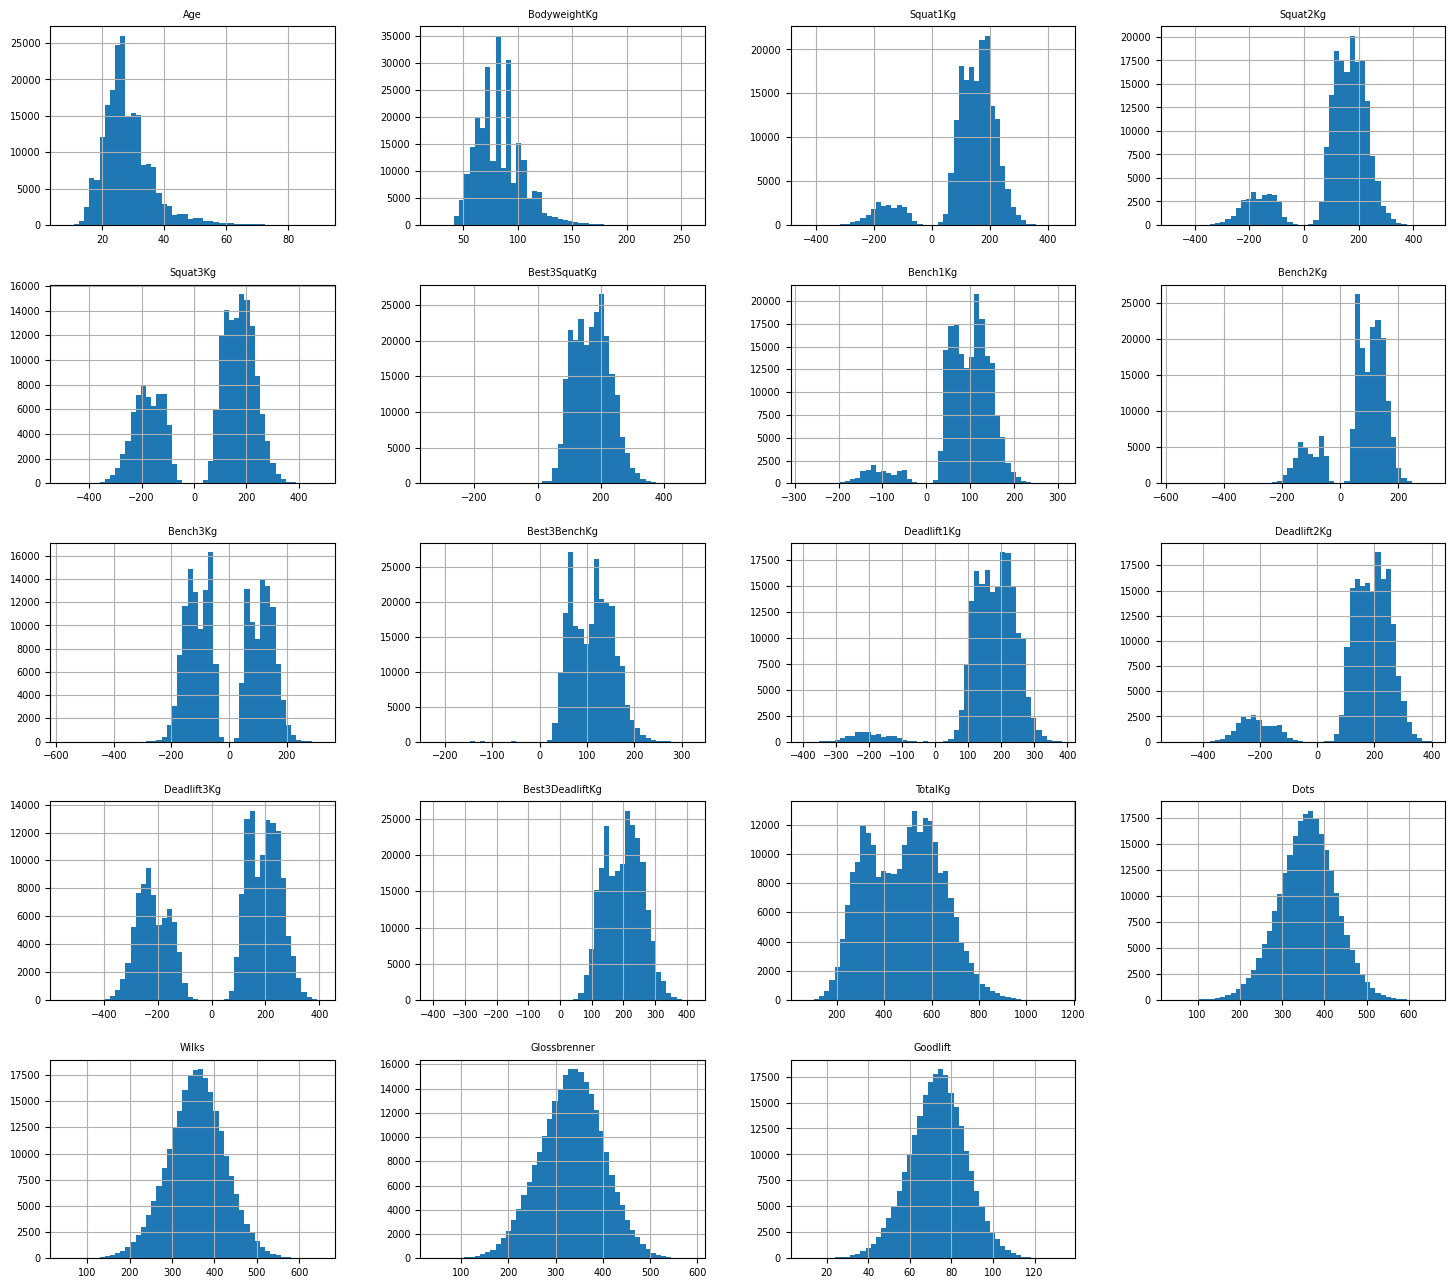

In [6]:
plt.rc('font', size=7)
plt.rc('axes', labelsize=7, titlesize=7)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
df_modified = df[[column for column in df.columns if '4Kg' not in column]] # filter out record attempts
df_modified.hist(bins=50, figsize=(18, 16))
plt.show()


x = value, y = count <br>
NEGATIVE VALUES IN LIFTS INDICATE FAILED ATTEMPTS

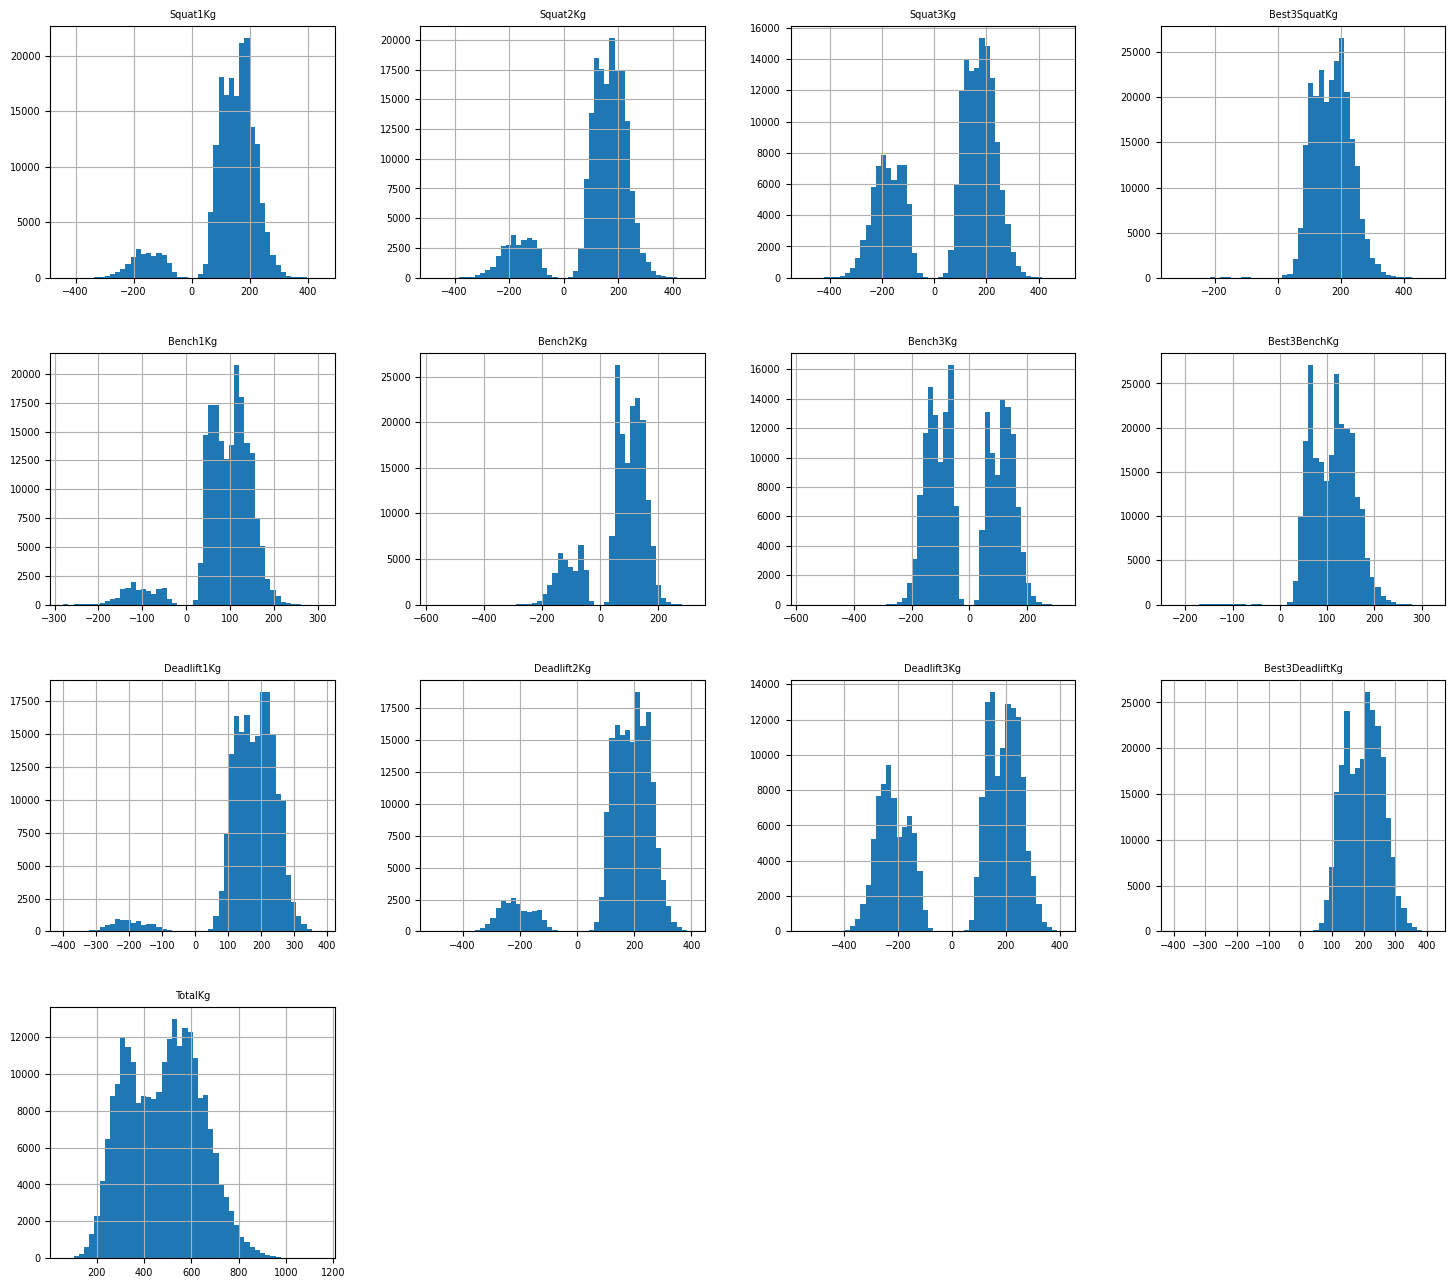

In [7]:
plt.rc('font', size=7)
plt.rc('axes', labelsize=7, titlesize=7)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
df_lifts = df[[column for column in df.columns if 'Kg' in column and 'Bodyweight' not in column and '4Kg' not in column]]
df_lifts.hist(bins=50, figsize=(18, 16))
plt.show()

Bimodal distribution on lift attempts, negatives = fail, positives = success <br>
More fails on 3rd attempts = riskier weight choice -> higher fatigue OR attempt to climb ranks/leaderboard <br>
More fails on Bench 3rd attempt = lifters could overestimate their bench strength

## Pre-processor

In [ ]:
df = pd.read_csv("../data/1-raw/openpowerlifting-2025-09-27-IPF.csv")

print(df.columns)
df.shape[:]

/var/folders/wm/mz0f2pm95tn34tffq_n21nv80000gn/T/ipykernel_18531/3191582298.py:1: DtypeWarning: Columns (33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/1-raw/openpowerlifting-2025-09-27-IPF.csv")


Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName', 'Sanctioned'],
      dtype='object')


(540696, 42)

In [ ]:
# Checking unique divisions to understand the data to only keep Open
print("Unique divisions in IPF Raw SBD:")
df['Division'].value_counts()

Unique divisions in IPF Raw SBD:


Division
Open            157022
MR-O             57626
Juniors          57169
FR-O             33715
Sub-Juniors      30064
                 ...  
Pre-Novice           1
Masters 50+          1
Master 70-74         1
Master 65-69         1
M-II                 1
Name: count, Length: 431, dtype: int64

In [ ]:
'''
Event: only SBD
Equipment: Raw only
Age: drop empty fields
Division: Open only (catches all with '-O', excludes lowercase 'o' such as 'Juniors' or 'Over 40')
TotalKg: drop empty fields (no DQs)
Place: must be a number (no DQs)
Best3: ensure all 3 lifts are successful (no DQs)
'''

EVENT = 'SBD'
EQUIPMENT = 'Raw'
DIVISION = ['Open', 'MR-O', 'FR-O'] # not including Juniors, duplicated lifter data in Open divisions
PARENT_FED = 'IPF'

ESSENTIAL_COLUMNS = [
    'Name', 'Date', 'Sex', 'Age', 'BodyweightKg',
    'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 
    'TotalKg', 'Dots'
]

data = df[
    (df['Event'] == EVENT) & 
    (df['Equipment'] == EQUIPMENT) &
    (df['Age'].notna()) &
    (df['Division'].isin(DIVISION)) &
    (df['TotalKg'].notna()) &
    (df['Place'].str.isnumeric()) &
    (df['Best3SquatKg'].notna()) &
    (df['Best3BenchKg'].notna()) &
    (df['Best3DeadliftKg'].notna()) &
    (df['ParentFederation'] == PARENT_FED)
].copy()

data = data[ESSENTIAL_COLUMNS].copy()

# Convert to datetime and sort by lifter and date (important for time-based feature engineering like calculating progression)
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(['Name', 'Date']).reset_index(drop=True)

# data.to_csv('../data/2-preprocessed/cleanNotIPF.csv', index=False)

print(f"Original rows: {len(df)}")
print(f"Filtered rows: {len(data)}")
print(f"Unique lifters: {data['Name'].nunique()}")
print(f"Male: {len(data[data['Sex']=='M'])}, Female: {len(data[data['Sex']=='F'])}")



Original rows: 3673663
Filtered rows: 175646
Unique lifters: 90267
Male: 111615, Female: 64026
